In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))

In [2]:
columns <- c(
    "Metadata_treatment",
    "Metadata_Well",
    "Metadata_number_of_singlecells",	
    "Metadata_FOV",
    "Metadata_treatment1",	
    "Metadata_Time",
    "Metadata_treatment2",
    "Metadata_treatment1_dose",	
    "Metadata_treatment1_unit",	
    'Metadata_treatment2_dose',	
    "Metadata_treatment2_unit",	
    "Metadata_ImageNumber",	
    "Metadata_serum",
    "Metadata_Cells_Number_Object_Number",	
    "Metadata_Cytoplasm_Parent_Cells",
    "Metadata_Cytoplasm_Parent_Nuclei",	
    "Metadata_ImageNumber_1",
    "Metadata_ImageNumber_2",	
    "Metadata_ImageNumber_3",	
    "Metadata_Nuclei_Number_Object_Number"
)

In [3]:
df_path <- file.path("../../4.processing_profiled_features/data/preprocessed_data/live_cell_pyroptosis_wave1_sc_first_time_norm_fs.parquet")

df <- arrow::read_parquet(df_path,col_select = columns)
df$well_fov <- paste0(df$Metadata_Well, "_", df$Metadata_FOV)
df$unique_cell <- paste0(df$Metadata_Time, "_", df$well_fov, "_", df$Metadata_ImageNumber, "_", df$Metadata_Nuclei_Number_Object_Number)
df$unique_well <- paste0(df$well_fov, "_", df$Metadata_treatment)
# show all columns in a jupyter notebooks
print(dim(df))
head(df)

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(columns)

  # Now:
  data %>% select(all_of(columns))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


[1] 3820888      23


Metadata_treatment Metadata_Well Metadata_number_of_singlecells Metadata_FOV
1 Ab1-42 0.4 uM      N11           652                            0002        
2 Ab1-42 0.4 uM      N11           652                            0002        
3 Ab1-42 0.4 uM      N11           652                            0002        
4 Ab1-42 0.4 uM      N11           652                            0002        
5 Ab1-42 0.4 uM      N11           652                            0002        
6 Ab1-42 0.4 uM      N11           652                            0002        
  Metadata_treatment1 Metadata_Time Metadata_treatment2
1 Ab1-42              01            NA                 
2 Ab1-42              01            NA                 
3 Ab1-42              01            NA                 
4 Ab1-42              01            NA                 
5 Ab1-42              01            NA                 
6 Ab1-42              01            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 0.4                      uM                       NA                       ⋯
2 0.4                      uM                       NA                       ⋯
3 0.4                      uM                       NA                       ⋯
4 0.4                      uM                       NA                       ⋯
5 0.4                      uM                       NA                       ⋯
6 0.4                      uM                       NA                       ⋯
  Metadata_Cells_Number_Object_Number Metadata_Cytoplasm_Parent_Cells
1 1                                   1                              
2 2                                   2                              
3 3                                   3                              
4 4                                   4                              
5 5                                   5                              
6 6                                   6                              
  Metadata_Cytoplasm_Parent_Nuclei Metadata_ImageNumber_1
1  1                               2                     
2  3                               2                     
3  4                               2                     
4  5                               2                     
5  7                               2                     
6 19                               2                     
  Metadata_ImageNumber_2 Metadata_ImageNumber_3
1 2                      2                     
2 2                      2                     
3 2                      2                     
4 2                      2                     
5 2                      2                     
6 2                      2                     
  Metadata_Nuclei_Number_Object_Number well_fov unique_cell     
1  1                                   N11_0002 01_N11_0002_2_1 
2  3                                   N11_0002 01_N11_0002_2_3 
3  4                                   N11_0002 01_N11_0002_2_4 
4  5                                   N11_0002 01_N11_0002_2_5 
5  7                                   N11_0002 01_N11_0002_2_7 
6 19                                   N11_0002 01_N11_0002_2_19
  unique_well           
1 N11_0002_Ab1-42 0.4 uM
2 N11_0002_Ab1-42 0.4 uM
3 N11_0002_Ab1-42 0.4 uM
4 N11_0002_Ab1-42 0.4 uM
5 N11_0002_Ab1-42 0.4 uM
6 N11_0002_Ab1-42 0.4 uM

In [4]:
# map the timepoints to the actual hour timepoint
timepoints <- data.frame(
    reference = c("00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17"),
    Metadata_timepoint  = c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,90)
)
# map the timepoints to the main df 
df <- df %>% left_join(timepoints, by = c("Metadata_Time" = "reference"))
head(df)

Metadata_treatment Metadata_Well Metadata_number_of_singlecells Metadata_FOV
1 Ab1-42 0.4 uM      N11           652                            0002        
2 Ab1-42 0.4 uM      N11           652                            0002        
3 Ab1-42 0.4 uM      N11           652                            0002        
4 Ab1-42 0.4 uM      N11           652                            0002        
5 Ab1-42 0.4 uM      N11           652                            0002        
6 Ab1-42 0.4 uM      N11           652                            0002        
  Metadata_treatment1 Metadata_Time Metadata_treatment2
1 Ab1-42              01            NA                 
2 Ab1-42              01            NA                 
3 Ab1-42              01            NA                 
4 Ab1-42              01            NA                 
5 Ab1-42              01            NA                 
6 Ab1-42              01            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 0.4                      uM                       NA                       ⋯
2 0.4                      uM                       NA                       ⋯
3 0.4                      uM                       NA                       ⋯
4 0.4                      uM                       NA                       ⋯
5 0.4                      uM                       NA                       ⋯
6 0.4                      uM                       NA                       ⋯
  Metadata_Cytoplasm_Parent_Cells Metadata_Cytoplasm_Parent_Nuclei
1 1                                1                              
2 2                                3                              
3 3                                4                              
4 4                                5                              
5 5                                7                              
6 6                               19                              
  Metadata_ImageNumber_1 Metadata_ImageNumber_2 Metadata_ImageNumber_3
1 2                      2                      2                     
2 2                      2                      2                     
3 2                      2                      2                     
4 2                      2                      2                     
5 2                      2                      2                     
6 2                      2                      2                     
  Metadata_Nuclei_Number_Object_Number well_fov unique_cell     
1  1                                   N11_0002 01_N11_0002_2_1 
2  3                                   N11_0002 01_N11_0002_2_3 
3  4                                   N11_0002 01_N11_0002_2_4 
4  5                                   N11_0002 01_N11_0002_2_5 
5  7                                   N11_0002 01_N11_0002_2_7 
6 19                                   N11_0002 01_N11_0002_2_19
  unique_well            Metadata_timepoint
1 N11_0002_Ab1-42 0.4 uM 4                 
2 N11_0002_Ab1-42 0.4 uM 4                 
3 N11_0002_Ab1-42 0.4 uM 4                 
4 N11_0002_Ab1-42 0.4 uM 4                 
5 N11_0002_Ab1-42 0.4 uM 4                 
6 N11_0002_Ab1-42 0.4 uM 4

In [5]:
# get the cell counts per well per time
cell_counts <- df %>% 
  group_by(unique_well,Metadata_treatment, Metadata_timepoint, Metadata_serum) %>% 
  # get the unique cell count per well per time
    summarise(cell_count = n_distinct(unique_cell)) %>%
    ungroup()

head(cell_counts)

`summarise()` has grouped output by 'unique_well', 'Metadata_treatment',
'Metadata_timepoint'. You can override using the `.groups` argument.


unique_well    Metadata_treatment Metadata_timepoint Metadata_serum
1 C04_0001_Media Media               1                 FBS           
2 C04_0001_Media Media               4                 FBS           
3 C04_0001_Media Media               7                 FBS           
4 C04_0001_Media Media              10                 FBS           
5 C04_0001_Media Media              13                 FBS           
6 C04_0001_Media Media              16                 FBS           
  cell_count
1 479       
2 527       
3 490       
4 510       
5 506       
6 517

In [6]:
cell_counts$Metadata_treatment <- factor(cell_counts$Metadata_treatment, levels = c(
    'Media',
    'DMSO CTL',
    'no Hoechst',

    'LPS 0.1 ug/ml',
    'LPS 1 ug/ml',
    'LPS 10 ug/ml',
    'LPS 1 ug/ml + ATP 2.5 mM',
    'LPS 1 ug/ml + Nigericin 0.1 uM',
    'LPS 1 ug/ml + Nigericin 0.5uM',
    'LPS 1 ug/ml + Nigericin 1 uM',
    'LPS 1 ug/ml + Nigericin 3uM',
    'LPS 1 ug/ml + Nigericin 5uM',

    'Flagellin 0.1 ug/ml',
    'Flagellin 1 ug/ml',
    'Flagellin 10 ug/ml',

    'Thapsigargin 0.5uM',
    'Thapsigargin 1 uM',
    'Thapsigargin 10 uM',
    'H2O2 100 nM',
    'H2O2 100 uM',
    'H2O2 500 uM',

    'Ab1-42 0.4 uM',
    'Ab1-42 2 uM',
    'Ab1-42 10 uM'
))


In [7]:
# 9 colors
# col 1 - 3 hues
# colorgrad1 <- c("white", "grey", "#585858")
colorgrad1 <- colorRampPalette(c("lightgrey", "grey"))(3)
# col 2 - 5 hues color ramp 5 hues
colorgrad2 <- colorRampPalette(c("pink", "darkred"))(11)
# col 3 - 3 hues
colorgrad3 <- colorRampPalette(c("yellow", "brown"))(3)
# col 4 - 3 hues
colorgrad4 <- colorRampPalette(c("lightblue", "darkblue"))(6)
# col 5 - 2 hues
colorgrad5 <- colorRampPalette(c("lightgreen", "darkgreen"))(3)
# col 6 - 3 hues
colorgrad6 <- colorRampPalette(c("purple", "#2e004b"))(3)
# col 7 - 2 hues
colorgrad7 <- colorRampPalette(c("cyan", "darkcyan"))(4)
# col 8 - 2 hues
colorgrad8 <- colorRampPalette(c("#ebb676", "darkorange"))(3)
# col 9 - 3 hues
colorgrad9 <- colorRampPalette(c("magenta", "#833b83"))(3)

In [8]:
# define the colors
colors <- c(
    'Media' = colorgrad1[1],
    'DMSO CTL' = colorgrad1[2],
    'no Hoechst' = colorgrad1[3],

    'LPS 0.1 ug/ml' = colorgrad2[1],
    'LPS 1 ug/ml' = colorgrad2[2],
    'LPS 10 ug/ml' = colorgrad2[3],
    'LPS 1 ug/ml + ATP 2.5 mM' = colorgrad2[4],
    'LPS 1 ug/ml + Nigericin 0.1 uM' = colorgrad2[5],
    'LPS 1 ug/ml + Nigericin 0.5uM' = colorgrad2[6],
    'LPS 1 ug/ml + Nigericin 1 uM' = colorgrad2[7],
    'LPS 1 ug/ml + Nigericin 3uM' = colorgrad2[8],
    'LPS 1 ug/ml + Nigericin 5uM' = colorgrad2[9],

    'Flagellin 0.1 ug/ml' = colorgrad5[1],
    'Flagellin 1 ug/ml' = colorgrad5[2],
    'Flagellin 10 ug/ml' = colorgrad5[3],

    'Thapsigargin 0.5uM' = colorgrad8[1],
    'Thapsigargin 1 uM' = colorgrad8[2],
    'Thapsigargin 10 uM' = colorgrad8[3],
    
    'H2O2 100 nM' = colorgrad7[1],
    'H2O2 100 uM' = colorgrad7[2],
    'H2O2 500 uM' = colorgrad7[3],

    'Ab1-42 0.4 uM' = colorgrad4[1],
    'Ab1-42 2 uM' = colorgrad4[2],
    'Ab1-42 10 uM' = colorgrad4[3]
)

In [9]:
width <- 20
height <- 20
options(repr.plot.width=width, repr.plot.height=height)
# plot the timelapse _profiles for a given feature 
timelapse_plot <- (
    # group the timepoints by the feature
    ggplot(cell_counts, aes(x=Metadata_timepoint, y=cell_count), fill=Metadata_treatment)
    + geom_line(aes(group=unique_well, color=Metadata_treatment), alpha=0.9, linewidth=1)
    # add a sd ribbon to the plot
    
    + theme_bw()

    + theme(
        axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title = element_text(size = 20),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 16),
        legend.position = "none",
        strip.text = element_text(size = 18),
    )
    + labs(
        x = "Time (h)",
        y = "Cell count"
    )
    + scale_color_manual(
        values = colors
    )
    + facet_wrap(~Metadata_treatment, scales="free_y", ncol=3)
)
timelapse_plot

# save the plot
ggsave(file.path("../figures","cell_count_timelapse.png"), timelapse_plot, width=width, height=height, dpi=600)

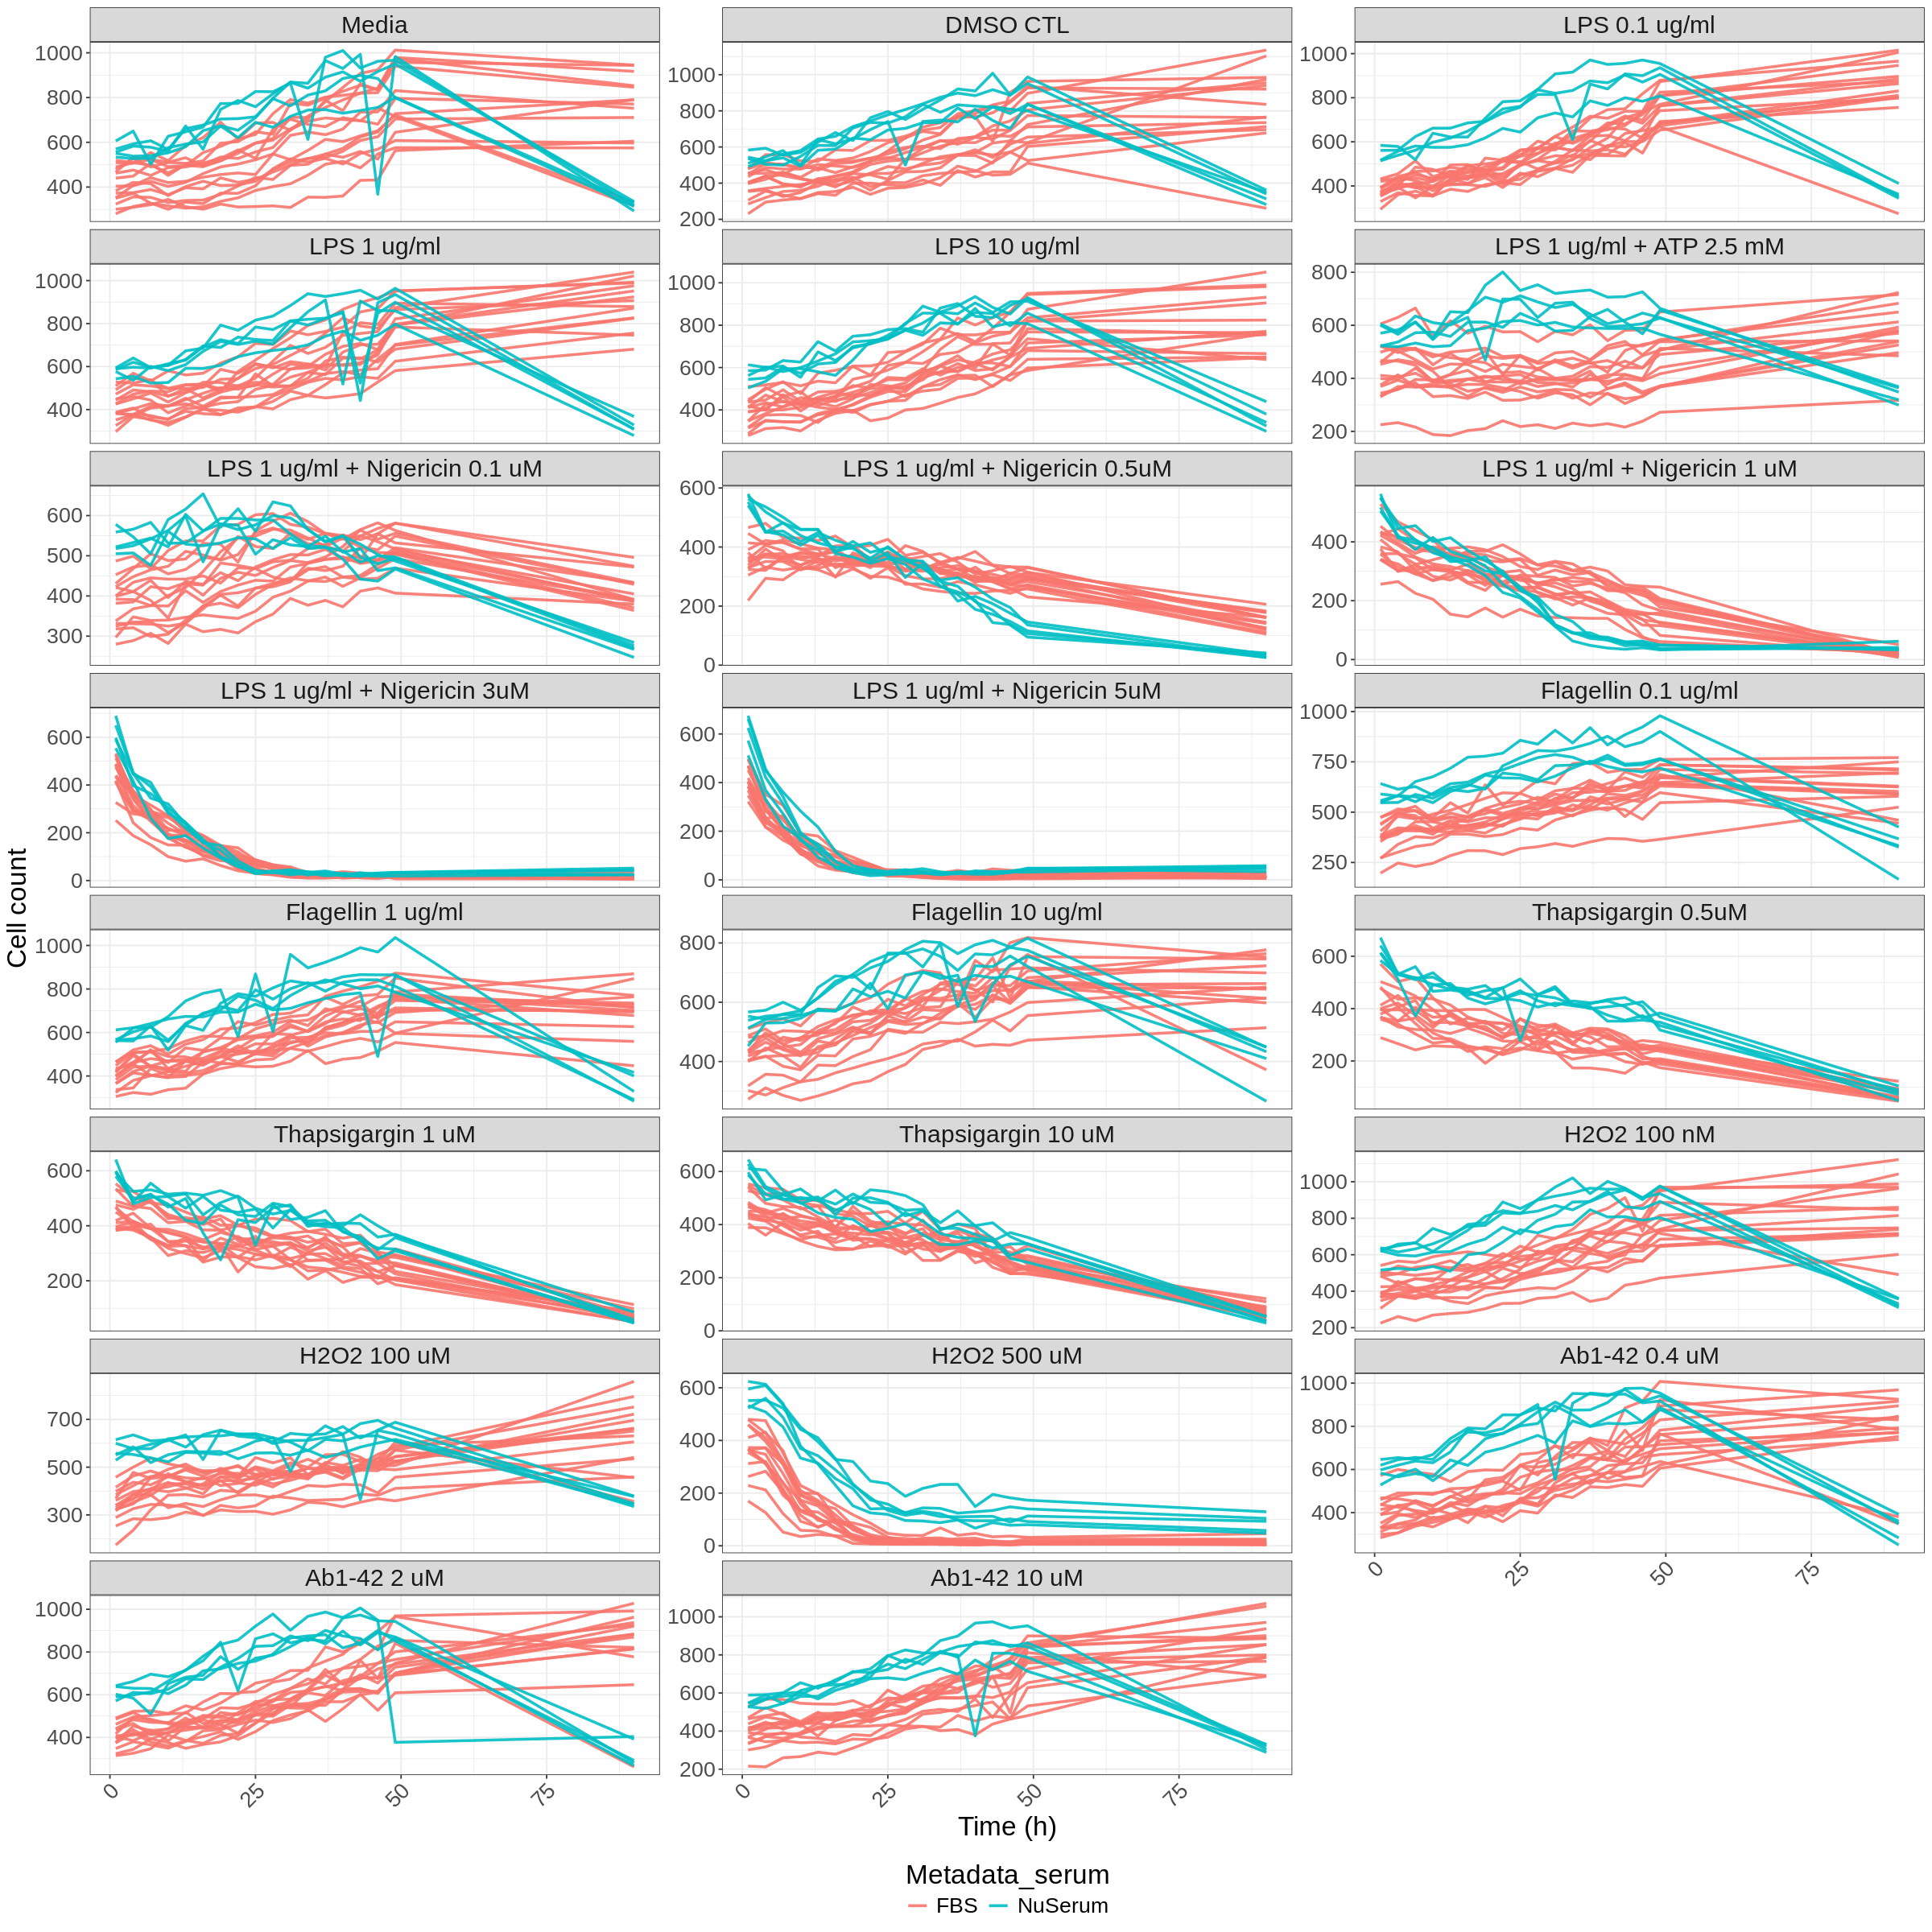

In [10]:
width <- 20
height <- 20
options(repr.plot.width=width, repr.plot.height=height)
# plot the timelapse _profiles for a given feature 
timelapse_plot <- (
    # group the timepoints by the feature
    ggplot(cell_counts, aes(x=Metadata_timepoint, y=cell_count), fill=Metadata_serum)
    + geom_line(aes(group=unique_well, color=Metadata_serum), alpha=0.9, linewidth=1)
    # add a sd ribbon to the plot
    
    + theme_bw()

    + theme(
        axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title = element_text(size = 20),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 16),
        strip.text = element_text(size = 18),
        legend.position = "bottom",
        legend.title.position = "top"
    )
    + labs(
        x = "Time (h)",
        y = "Cell count"
    )
    + facet_wrap(~Metadata_treatment, scales="free_y", ncol=3)
)
timelapse_plot

# save the plot
ggsave(file.path("../figures","cell_count_timelapse_serum.png"), timelapse_plot, width=width, height=height, dpi=600)